# Channel-flow turbulence model

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import xcompact3d_toolbox as x3d

### Calculations

#### Reynolds number for Channel (Pipe) Flow

Reynolds number

$$R_e=\frac{\rho v D}{\mu}$$

where,

Laminar Flow: $R_e \le 2300$ 

Transition Flow: $2300 \le R_e \le 4000$

Turbulent Flow: $R_e \ge 4000$

Source: FLUID MECHANICS: FUNDAMENTALS AND APPLICATIONS Cengal

In [8]:
# Calculate Reynolds number from wind speed
# Velocity [m/s]
v = .02

# Density [kg/m3]
rho = 1.225

# Channel diameter [m]
D = 5

# Dynamic Viscosity [kg/m/s]
mu = 1.789E-05

# Reynolds number
Re = (rho*v*D)/mu
Re

6847.400782560089

### Parameters

In [2]:
x3d.param["mytype"] = np.float64

In [3]:
prm = x3d.Parameters(
    filename="input.i3d",
    ## BasicParam ##

    # Flow type
    itype=8,   # Enables Sandbox parameters
    ilesmod=0,  # Enables Large-Eddy methodologies (0: DNS, 1: LES)
    iibm=0,     # Flag for immersed boundary method

    # Domain decomposition
    p_row=0,
    p_col=0,

    # Mesh
    nx=128,
    ny=65,
    nz=65,
    istret = 2,            # y mesh refinement (0:no, 1:center, 2:both sides, 3:bottom)
    beta = 0.259065151,   # Refinement parameter (beta)

    # Domain dimensions
    xlx=8.0,
    yly=4.0,
    zlz=4.0,

    # Boundary conditions 
    # 0 - Periodic (cyclic) boundary conditions
    # 1 - Free-slip boundary conditions
    # 2 - Dirichlet boundary conditions (no-slip), def: type of boundary condition, where numerical value is given directly to boundary faces
    nclx1=0,    # Velocity boundary condition where x=0
    nclxn=0,    # Velocity boundary condition where x=xlx
    ncly1=2,    # Velocity boundary condition where y=0
    nclyn=2,    # Velocity boundary condition where y=yly
    nclz1=2,    # Velocity boundary condition where z=0
    nclzn=2,    # Velocity boundary condition where z=zlz
    
    # Initial Conditions
    iin=1,                  # Inflow conditions (1: classic, 2: turbinit, 4: SEM)
    re=7000.0,              # Reynolds Number
    #cpg = F,                 # if cpg=T, then re is friction Reynolds number
    init_noise=0.125,       # Turbulence intensity (1=100%) !! Initial condition
    inflow_noise=0.0,       # Turbulence intensity (1=100%) !! Inflow condition
    
    # Time stepping
    dt=0.005,       # Time step
    ifirst=1,       # First iteration
    ilast=100000,   # Last iteration
    
    # Dissipation control
    nu0nu=4.0,  # Ratio between hyperviscosity/viscosity at nu (dissipation factor intensity)
    cnu=0.44,   # Ratio between hyperviscosity at km=2/3π and kc=π (dissipation factor range)
    
    # InOutParam
    irestart=0,         # Read initial flow field (0: No, 1: Yes)
    icheckpoint=5000,   # Frequency for writing backup file
    ioutput=1000,       # Frequency for visualization file
    #iprocessing=100,   # Frequency for online postprocessing
    
    # LESModel
    #jles=4,
    
    # ScalarParam
    numscalar=0,    # How many scalars? (Set to zero to disable scalars)
    nclxS1=0,
    nclxSn=0,
    nclyS1=2,
    nclySn=2,
    nclzS1=0,
    nclzSn=0,
    # sc=[1.0],
    # ri=[0.0],  # Zero for numerical dye
    # uset=[0.0],  # Zero for numerical dye
    # cp=[1.0],
    #iibmS=3, # This is experimental, not available at the main repo
)

In [4]:
prm.write()

In [5]:
prm = x3d.Parameters(loadfile="input.i3d")

In [6]:
grid = prm.get_mesh()

### Show mesh

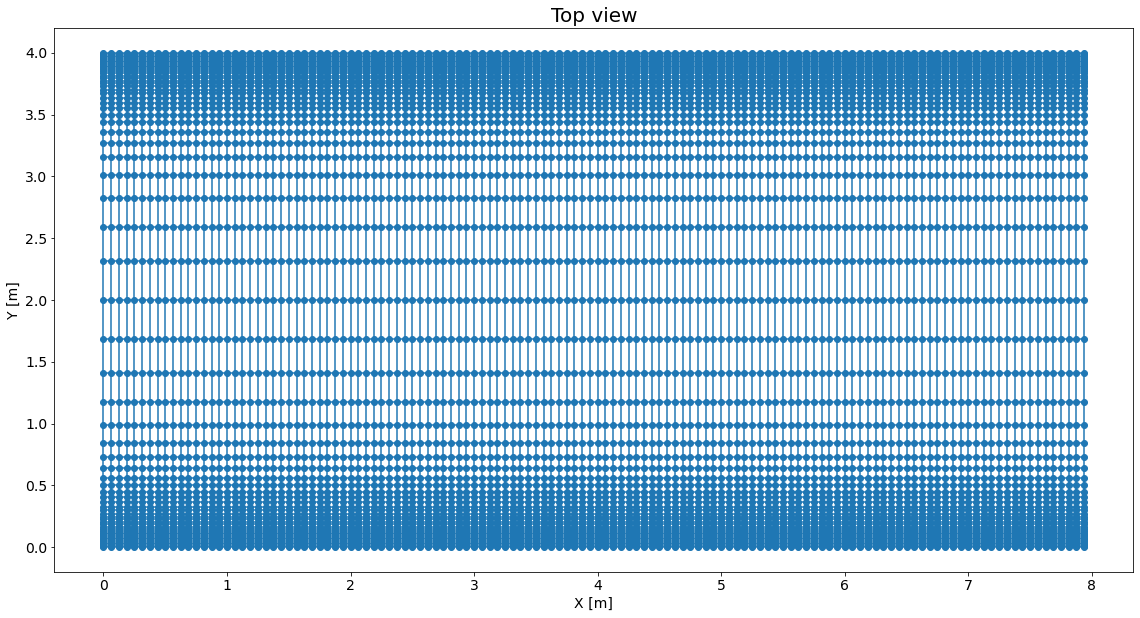

In [7]:
from matplotlib.collections import LineCollection

x_grid, y_grid = np.meshgrid(grid['x'], grid['y'])

fig = plt.figure(figsize = (20,10))
plt.scatter(x_grid, y_grid)

segs1 = np.stack((x_grid,y_grid), axis=2)
segs2 = segs1.transpose(1,0,2)
plt.gca().add_collection(LineCollection(segs1))
plt.gca().add_collection(LineCollection(segs2))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.xlabel('X [m]', fontsize=14)
plt.ylabel('Y [m]', fontsize=14)
plt.title('Top view', fontsize=20)
plt.gca().set_aspect('equal', adjustable='box')

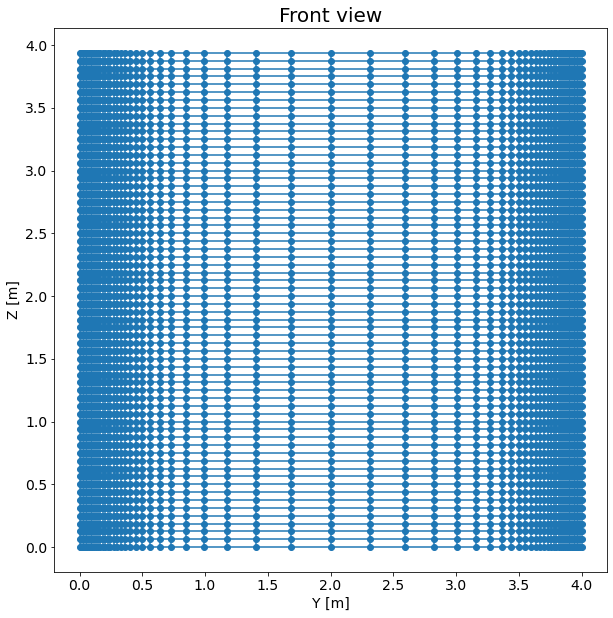

In [62]:
from matplotlib.collections import LineCollection

y_grid, z_grid = np.meshgrid(grid['y'], grid['z'])

fig = plt.figure(figsize = (10,10))
plt.scatter(y_grid, z_grid)

segs1 = np.stack((y_grid,z_grid), axis=2)
segs2 = segs1.transpose(1,0,2)
plt.gca().add_collection(LineCollection(segs1))
plt.gca().add_collection(LineCollection(segs2))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.xlabel('Y [m]', fontsize=14)
plt.ylabel('Z [m]', fontsize=14)
plt.title('Front view', fontsize=20)
plt.gca().set_aspect('equal', adjustable='box')

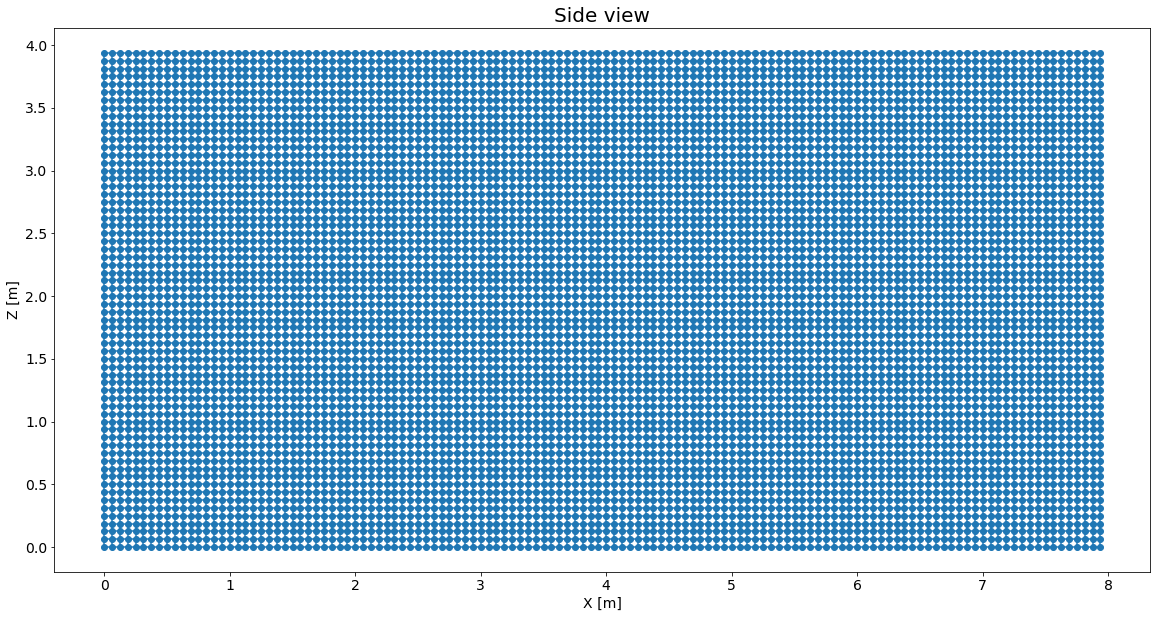

In [63]:
from matplotlib.collections import LineCollection

x_grid, z_grid = np.meshgrid(grid['x'], grid['z'])

fig = plt.figure(figsize = (20,10))
plt.scatter(x_grid, z_grid)

segs1 = np.stack((x_grid,z_grid), axis=2)
segs2 = segs1.transpose(1,0,2)
plt.gca().add_collection(LineCollection(segs1))
plt.gca().add_collection(LineCollection(segs2))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.xlabel('X [m]', fontsize=14)
plt.ylabel('Z [m]', fontsize=14)
plt.title('Side view', fontsize=20)
plt.gca().set_aspect('equal', adjustable='box')

In [64]:
ds = x3d.init_dataset(prm)
ds

<xarray.Dataset>
Dimensions:  (x: 128, y: 65, z: 64, n: 0)
Coordinates:
  * x        (x) float64 0.0 0.0625 0.125 0.1875 0.25 ... 7.75 7.812 7.875 7.938
  * y        (y) float64 0.0 0.01224 0.02454 0.03695 ... 3.963 3.975 3.988 4.0
  * z        (z) float64 0.0 0.0625 0.125 0.1875 0.25 ... 3.75 3.812 3.875 3.938
  * n        (n) float64 
Data variables:
    ux       (x, y, z) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    uy       (x, y, z) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    uz       (x, y, z) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    vol_frc  (x, y, z) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

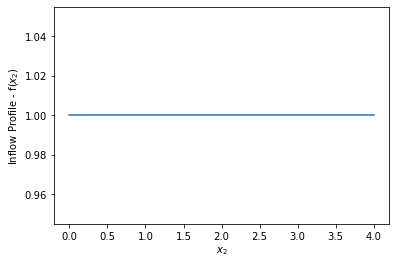

In [65]:
fun = xr.ones_like(ds.y)

# This attribute will be shown in the figure
fun.attrs["long_name"] = r"Inflow Profile - f($x_2$)"

fun.plot();

In [17]:
"ux uy uz".split()

['ux', 'uy', 'uz']

Initial Condition for Streamwise Velocity


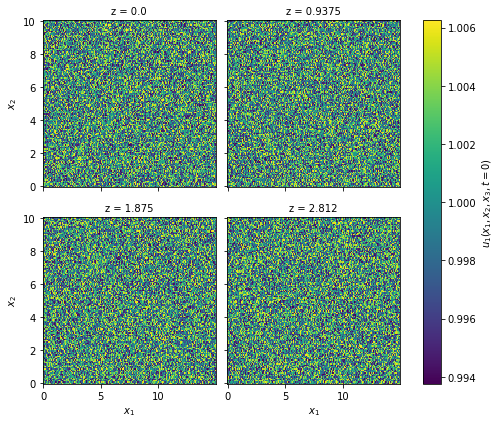

Initial Condition for Vertical Velocity


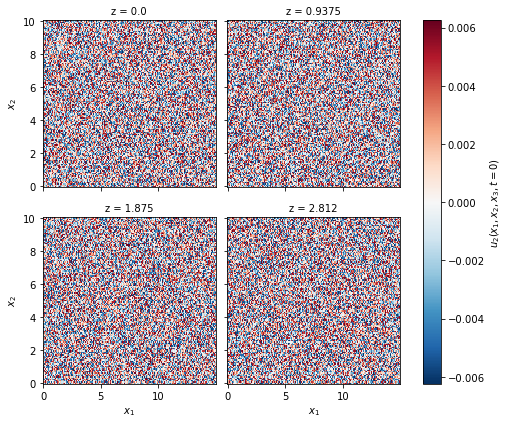

Initial Condition for Spanwise Velocity


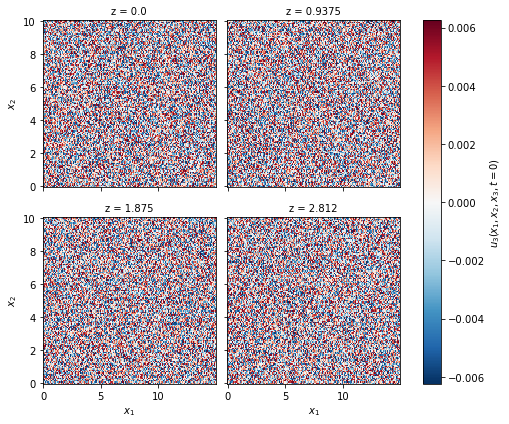

In [16]:
for key in "ux uy uz".split():
    #
    print(ds[key].attrs["name"])
    #
    ds[key] *= 0.0
    ds[key] += prm.init_noise * ((np.random.random(ds[key].shape) - 0.5))
    #ds[key] *= mod
    #
    if key == "ux":
        ds[key] += fun
    #
    ds[key].sel(z=slice(None, None, ds.z.size // 3)).plot(
        x="x", y="y", col="z", col_wrap=2
    )
    plt.show()
    #

plt.close("all")